# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 15119 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (    1 of 15119) |           | Elapsed Time: 0:00:27 ETA:  4 days, 19:50:16

  0% (   71 of 15119) |                    | Elapsed Time: 0:00:28 ETA:  0:03:08

  0% (  144 of 15119) |                    | Elapsed Time: 0:00:29 ETA:  0:03:03

  1% (  189 of 15119) |                    | Elapsed Time: 0:00:30 ETA:  0:03:05

  1% (  262 of 15119) |                    | Elapsed Time: 0:00:31 ETA:  0:03:03

  2% (  330 of 15119) |                    | Elapsed Time: 0:00:32 ETA:  0:03:04

  2% (  378 of 15119) |                    | Elapsed Time: 0:00:33 ETA:  0:03:06

  2% (  446 of 15119) |                    | Elapsed Time: 0:00:34 ETA:  0:03:06

  3% (  517 of 15119) |                    | Elapsed Time: 0:00:35 ETA:  0:03:04

  3% (  567 of 15119) |                    | Elapsed Time: 0:00:35 ETA:  0:03:03

  4% (  638 of 15119) |                    | Elapsed Time: 0:00:36 ETA:  0:03:02

  4% (  717 of 15119) |                    | Elapsed Time: 0:00:37 ETA:  0:02:59

  5% (  756 of 15119) |#                   | Elapsed Time: 0:00:38 ETA:  0:02:56

  5% (  836 of 15119) |#                   | Elapsed Time: 0:00:39 ETA:  0:02:52

  6% (  917 of 15119) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:46

  6% (  945 of 15119) |#                   | Elapsed Time: 0:00:40 ETA:  0:02:42

  6% ( 1024 of 15119) |#                   | Elapsed Time: 0:00:41 ETA:  0:02:37

  7% ( 1100 of 15119) |#                   | Elapsed Time: 0:00:42 ETA:  0:02:34

  7% ( 1134 of 15119) |#                   | Elapsed Time: 0:00:43 ETA:  0:02:32

  8% ( 1210 of 15119) |#                   | Elapsed Time: 0:00:44 ETA:  0:02:29

  8% ( 1287 of 15119) |#                   | Elapsed Time: 0:00:45 ETA:  0:02:29

  8% ( 1323 of 15119) |#                   | Elapsed Time: 0:00:45 ETA:  0:02:29

  9% ( 1397 of 15119) |#                   | Elapsed Time: 0:00:46 ETA:  0:02:31

  9% ( 1470 of 15119) |#                   | Elapsed Time: 0:00:47 ETA:  0:02:33

 10% ( 1512 of 15119) |##                  | Elapsed Time: 0:00:48 ETA:  0:02:32

 10% ( 1584 of 15119) |##                  | Elapsed Time: 0:00:49 ETA:  0:02:34

 10% ( 1658 of 15119) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:34

 11% ( 1701 of 15119) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:33

 11% ( 1776 of 15119) |##                  | Elapsed Time: 0:00:51 ETA:  0:02:33

 11% ( 1808 of 15119) |##                  | Elapsed Time: 0:00:53 ETA:  0:02:59

 12% ( 1890 of 15119) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:01

 12% ( 1961 of 15119) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:01

 13% ( 2028 of 15119) |##                  | Elapsed Time: 0:00:56 ETA:  0:03:02

 13% ( 2079 of 15119) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:03

 14% ( 2146 of 15119) |##                  | Elapsed Time: 0:00:58 ETA:  0:03:05

 14% ( 2217 of 15119) |##                  | Elapsed Time: 0:00:59 ETA:  0:03:04

 15% ( 2268 of 15119) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:08

 15% ( 2339 of 15119) |###                 | Elapsed Time: 0:01:00 ETA:  0:02:40

 15% ( 2408 of 15119) |###                 | Elapsed Time: 0:01:01 ETA:  0:02:39

 16% ( 2457 of 15119) |###                 | Elapsed Time: 0:01:02 ETA:  0:02:38

 16% ( 2528 of 15119) |###                 | Elapsed Time: 0:01:03 ETA:  0:02:37

 17% ( 2604 of 15119) |###                 | Elapsed Time: 0:01:04 ETA:  0:02:33

 17% ( 2646 of 15119) |###                 | Elapsed Time: 0:01:05 ETA:  0:02:30

 17% ( 2714 of 15119) |###                 | Elapsed Time: 0:01:06 ETA:  0:02:28

 18% ( 2786 of 15119) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:27

 18% ( 2835 of 15119) |###                 | Elapsed Time: 0:01:07 ETA:  0:02:23

 19% ( 2916 of 15119) |###                 | Elapsed Time: 0:01:08 ETA:  0:02:18

 19% ( 2997 of 15119) |###                 | Elapsed Time: 0:01:09 ETA:  0:02:13

 20% ( 3024 of 15119) |####                | Elapsed Time: 0:01:10 ETA:  0:02:12

 20% ( 3098 of 15119) |####                | Elapsed Time: 0:01:11 ETA:  0:02:10

 21% ( 3175 of 15119) |####                | Elapsed Time: 0:01:12 ETA:  0:02:09

 21% ( 3213 of 15119) |####                | Elapsed Time: 0:01:12 ETA:  0:02:08

 21% ( 3288 of 15119) |####                | Elapsed Time: 0:01:13 ETA:  0:02:05

 22% ( 3365 of 15119) |####                | Elapsed Time: 0:01:14 ETA:  0:02:02

 22% ( 3402 of 15119) |####                | Elapsed Time: 0:01:15 ETA:  0:02:01

 23% ( 3480 of 15119) |####                | Elapsed Time: 0:01:16 ETA:  0:02:01

 23% ( 3553 of 15119) |####                | Elapsed Time: 0:01:17 ETA:  0:02:03

 23% ( 3591 of 15119) |####                | Elapsed Time: 0:01:17 ETA:  0:02:04

 24% ( 3665 of 15119) |####                | Elapsed Time: 0:01:18 ETA:  0:02:03

 24% ( 3735 of 15119) |####                | Elapsed Time: 0:01:19 ETA:  0:02:04

 25% ( 3780 of 15119) |#####               | Elapsed Time: 0:01:20 ETA:  0:02:04

 25% ( 3851 of 15119) |#####               | Elapsed Time: 0:01:21 ETA:  0:02:05

 25% ( 3918 of 15119) |#####               | Elapsed Time: 0:01:22 ETA:  0:02:08

 26% ( 3969 of 15119) |#####               | Elapsed Time: 0:01:23 ETA:  0:02:10

 26% ( 4026 of 15119) |#####               | Elapsed Time: 0:01:24 ETA:  0:02:17

 26% ( 4076 of 15119) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:26

 27% ( 4139 of 15119) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:27

 27% ( 4158 of 15119) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:32

 27% ( 4221 of 15119) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:34

 28% ( 4287 of 15119) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:34

 28% ( 4347 of 15119) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:34

 29% ( 4412 of 15119) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:34

 29% ( 4480 of 15119) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:32

 30% ( 4536 of 15119) |######              | Elapsed Time: 0:01:32 ETA:  0:02:25

 30% ( 4601 of 15119) |######              | Elapsed Time: 0:01:33 ETA:  0:02:17

 30% ( 4673 of 15119) |######              | Elapsed Time: 0:01:34 ETA:  0:02:12

 31% ( 4725 of 15119) |######              | Elapsed Time: 0:01:35 ETA:  0:02:09

 31% ( 4803 of 15119) |######              | Elapsed Time: 0:01:36 ETA:  0:02:03

 32% ( 4878 of 15119) |######              | Elapsed Time: 0:01:37 ETA:  0:01:58

 32% ( 4914 of 15119) |######              | Elapsed Time: 0:01:37 ETA:  0:01:58

 33% ( 4992 of 15119) |######              | Elapsed Time: 0:01:38 ETA:  0:01:52

 33% ( 5057 of 15119) |######              | Elapsed Time: 0:01:39 ETA:  0:01:52

 33% ( 5084 of 15119) |######              | Elapsed Time: 0:01:41 ETA:  0:02:22

 33% ( 5103 of 15119) |######              | Elapsed Time: 0:01:41 ETA:  0:02:23

 34% ( 5176 of 15119) |######              | Elapsed Time: 0:01:42 ETA:  0:02:22

 34% ( 5249 of 15119) |######              | Elapsed Time: 0:01:43 ETA:  0:02:18

 35% ( 5292 of 15119) |#######             | Elapsed Time: 0:01:44 ETA:  0:02:23

 35% ( 5367 of 15119) |#######             | Elapsed Time: 0:01:45 ETA:  0:02:22

 36% ( 5447 of 15119) |#######             | Elapsed Time: 0:01:46 ETA:  0:02:15

 36% ( 5481 of 15119) |#######             | Elapsed Time: 0:01:46 ETA:  0:02:19

 36% ( 5551 of 15119) |#######             | Elapsed Time: 0:01:47 ETA:  0:02:15

 37% ( 5621 of 15119) |#######             | Elapsed Time: 0:01:48 ETA:  0:01:40

 37% ( 5670 of 15119) |#######             | Elapsed Time: 0:01:49 ETA:  0:01:38

 38% ( 5747 of 15119) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:35

 38% ( 5825 of 15119) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:33

 38% ( 5859 of 15119) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:30

 39% ( 5933 of 15119) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:30

 39% ( 6009 of 15119) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:30

 40% ( 6048 of 15119) |########            | Elapsed Time: 0:01:54 ETA:  0:01:30

 40% ( 6125 of 15119) |########            | Elapsed Time: 0:01:55 ETA:  0:01:27

 41% ( 6199 of 15119) |########            | Elapsed Time: 0:01:56 ETA:  0:01:25

 41% ( 6237 of 15119) |########            | Elapsed Time: 0:01:56 ETA:  0:01:24

 41% ( 6314 of 15119) |########            | Elapsed Time: 0:01:57 ETA:  0:01:23

 42% ( 6392 of 15119) |########            | Elapsed Time: 0:01:58 ETA:  0:01:21

 42% ( 6426 of 15119) |########            | Elapsed Time: 0:01:59 ETA:  0:01:21

 43% ( 6505 of 15119) |########            | Elapsed Time: 0:02:00 ETA:  0:01:18

 43% ( 6586 of 15119) |########            | Elapsed Time: 0:02:01 ETA:  0:01:15

 43% ( 6615 of 15119) |########            | Elapsed Time: 0:02:01 ETA:  0:01:13

 44% ( 6692 of 15119) |########            | Elapsed Time: 0:02:02 ETA:  0:01:12

 44% ( 6768 of 15119) |########            | Elapsed Time: 0:02:03 ETA:  0:01:11

 45% ( 6804 of 15119) |#########           | Elapsed Time: 0:02:04 ETA:  0:01:10

 45% ( 6882 of 15119) |#########           | Elapsed Time: 0:02:05 ETA:  0:01:08

 46% ( 6961 of 15119) |#########           | Elapsed Time: 0:02:06 ETA:  0:01:07

 46% ( 6993 of 15119) |#########           | Elapsed Time: 0:02:06 ETA:  0:01:08

 46% ( 7072 of 15119) |#########           | Elapsed Time: 0:02:07 ETA:  0:01:07

 47% ( 7148 of 15119) |#########           | Elapsed Time: 0:02:08 ETA:  0:01:08

 47% ( 7182 of 15119) |#########           | Elapsed Time: 0:02:08 ETA:  0:01:08

 47% ( 7253 of 15119) |#########           | Elapsed Time: 0:02:09 ETA:  0:01:10

 48% ( 7326 of 15119) |#########           | Elapsed Time: 0:02:10 ETA:  0:01:09

 48% ( 7371 of 15119) |#########           | Elapsed Time: 0:02:11 ETA:  0:01:09

 49% ( 7446 of 15119) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:09

 49% ( 7521 of 15119) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:09

 50% ( 7560 of 15119) |##########          | Elapsed Time: 0:02:14 ETA:  0:01:09

 50% ( 7632 of 15119) |##########          | Elapsed Time: 0:02:15 ETA:  0:01:10

 50% ( 7704 of 15119) |##########          | Elapsed Time: 0:02:16 ETA:  0:01:11

 51% ( 7749 of 15119) |##########          | Elapsed Time: 0:02:16 ETA:  0:01:08

 51% ( 7817 of 15119) |##########          | Elapsed Time: 0:02:17 ETA:  0:01:08

 52% ( 7887 of 15119) |##########          | Elapsed Time: 0:02:18 ETA:  0:01:09

 52% ( 7938 of 15119) |##########          | Elapsed Time: 0:02:19 ETA:  0:01:09

 53% ( 8015 of 15119) |##########          | Elapsed Time: 0:02:20 ETA:  0:01:08

 53% ( 8095 of 15119) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:05

 53% ( 8127 of 15119) |##########          | Elapsed Time: 0:02:21 ETA:  0:01:04

 54% ( 8200 of 15119) |##########          | Elapsed Time: 0:02:22 ETA:  0:01:02

 54% ( 8278 of 15119) |##########          | Elapsed Time: 0:02:23 ETA:  0:00:59

 55% ( 8316 of 15119) |###########         | Elapsed Time: 0:02:24 ETA:  0:01:01

 55% ( 8387 of 15119) |###########         | Elapsed Time: 0:02:25 ETA:  0:00:59

 55% ( 8464 of 15119) |###########         | Elapsed Time: 0:02:26 ETA:  0:00:55

 56% ( 8505 of 15119) |###########         | Elapsed Time: 0:02:26 ETA:  0:00:53

 56% ( 8575 of 15119) |###########         | Elapsed Time: 0:02:27 ETA:  0:00:55

 57% ( 8651 of 15119) |###########         | Elapsed Time: 0:02:28 ETA:  0:00:55

 57% ( 8694 of 15119) |###########         | Elapsed Time: 0:02:29 ETA:  0:00:55

 57% ( 8769 of 15119) |###########         | Elapsed Time: 0:02:30 ETA:  0:00:53

 58% ( 8846 of 15119) |###########         | Elapsed Time: 0:02:31 ETA:  0:00:52

 58% ( 8883 of 15119) |###########         | Elapsed Time: 0:02:31 ETA:  0:00:51

 59% ( 8958 of 15119) |###########         | Elapsed Time: 0:02:32 ETA:  0:00:48

 59% ( 9033 of 15119) |###########         | Elapsed Time: 0:02:33 ETA:  0:00:48

 60% ( 9072 of 15119) |############        | Elapsed Time: 0:02:34 ETA:  0:00:49

 60% ( 9125 of 15119) |############        | Elapsed Time: 0:02:36 ETA:  0:01:21

 60% ( 9199 of 15119) |############        | Elapsed Time: 0:02:37 ETA:  0:01:21

 61% ( 9261 of 15119) |############        | Elapsed Time: 0:02:38 ETA:  0:01:18

 61% ( 9335 of 15119) |############        | Elapsed Time: 0:02:39 ETA:  0:01:18

 62% ( 9408 of 15119) |############        | Elapsed Time: 0:02:40 ETA:  0:01:19

 62% ( 9450 of 15119) |############        | Elapsed Time: 0:02:40 ETA:  0:01:19

 63% ( 9525 of 15119) |############        | Elapsed Time: 0:02:42 ETA:  0:01:18

 63% ( 9593 of 15119) |############        | Elapsed Time: 0:02:43 ETA:  0:01:20

 63% ( 9639 of 15119) |############        | Elapsed Time: 0:02:43 ETA:  0:01:21

 64% ( 9715 of 15119) |############        | Elapsed Time: 0:02:44 ETA:  0:00:45

 64% ( 9784 of 15119) |############        | Elapsed Time: 0:02:45 ETA:  0:00:46

 65% ( 9828 of 15119) |#############       | Elapsed Time: 0:02:46 ETA:  0:00:45

 65% ( 9910 of 15119) |#############       | Elapsed Time: 0:02:47 ETA:  0:00:42

 66% ( 9985 of 15119) |#############       | Elapsed Time: 0:02:48 ETA:  0:00:40

 66% (10017 of 15119) |#############       | Elapsed Time: 0:02:48 ETA:  0:00:38

 66% (10092 of 15119) |#############       | Elapsed Time: 0:02:49 ETA:  0:00:37

 67% (10168 of 15119) |#############       | Elapsed Time: 0:02:50 ETA:  0:00:34

 67% (10206 of 15119) |#############       | Elapsed Time: 0:02:51 ETA:  0:00:31

 67% (10276 of 15119) |#############       | Elapsed Time: 0:02:52 ETA:  0:00:31

 68% (10349 of 15119) |#############       | Elapsed Time: 0:02:53 ETA:  0:00:29

 68% (10395 of 15119) |#############       | Elapsed Time: 0:02:53 ETA:  0:00:29

 69% (10472 of 15119) |#############       | Elapsed Time: 0:02:54 ETA:  0:00:30

 69% (10549 of 15119) |#############       | Elapsed Time: 0:02:55 ETA:  0:00:28

 70% (10584 of 15119) |##############      | Elapsed Time: 0:02:56 ETA:  0:00:27

 70% (10649 of 15119) |##############      | Elapsed Time: 0:02:57 ETA:  0:00:30

 70% (10722 of 15119) |##############      | Elapsed Time: 0:02:58 ETA:  0:00:30

 71% (10773 of 15119) |##############      | Elapsed Time: 0:02:59 ETA:  0:00:30

 71% (10842 of 15119) |##############      | Elapsed Time: 0:03:00 ETA:  0:00:30

 72% (10916 of 15119) |##############      | Elapsed Time: 0:03:01 ETA:  0:00:28

 72% (10962 of 15119) |##############      | Elapsed Time: 0:03:01 ETA:  0:00:27

 72% (11036 of 15119) |##############      | Elapsed Time: 0:03:02 ETA:  0:00:27

 73% (11108 of 15119) |##############      | Elapsed Time: 0:03:03 ETA:  0:00:28

 73% (11151 of 15119) |##############      | Elapsed Time: 0:03:04 ETA:  0:00:28

 74% (11222 of 15119) |##############      | Elapsed Time: 0:03:05 ETA:  0:00:25

 74% (11295 of 15119) |##############      | Elapsed Time: 0:03:06 ETA:  0:00:24

 75% (11340 of 15119) |###############     | Elapsed Time: 0:03:07 ETA:  0:00:21

 75% (11418 of 15119) |###############     | Elapsed Time: 0:03:08 ETA:  0:00:17

 76% (11494 of 15119) |###############     | Elapsed Time: 0:03:09 ETA:  0:00:15

 76% (11529 of 15119) |###############     | Elapsed Time: 0:03:09 ETA:  0:00:15

 76% (11607 of 15119) |###############     | Elapsed Time: 0:03:10 ETA:  0:00:12

 77% (11683 of 15119) |###############     | Elapsed Time: 0:03:11 ETA:  0:00:10

 77% (11718 of 15119) |###############     | Elapsed Time: 0:03:12 ETA:  0:00:10

 77% (11788 of 15119) |###############     | Elapsed Time: 0:03:13 ETA:  0:00:09

 78% (11866 of 15119) |###############     | Elapsed Time: 0:03:14 ETA:  0:00:06

 78% (11907 of 15119) |###############     | Elapsed Time: 0:03:14 ETA:  0:00:06

 79% (11987 of 15119) |###############     | Elapsed Time: 0:03:15 ETA:  0:00:04

 79% (12059 of 15119) |###############     | Elapsed Time: 0:03:16 ETA:  0:00:04

 80% (12096 of 15119) |################    | Elapsed Time: 0:03:17 ETA:  0:00:04

 80% (12169 of 15119) |################    | Elapsed Time: 0:03:18 ETA:  0:00:05

 80% (12239 of 15119) |################    | Elapsed Time: 0:03:19 ETA:  0:00:06

 81% (12285 of 15119) |################    | Elapsed Time: 0:03:19 ETA:  0:00:06

 81% (12360 of 15119) |################    | Elapsed Time: 0:03:20 ETA:  0:00:03

 82% (12433 of 15119) |################    | Elapsed Time: 0:03:21 ETA:  0:00:03

 82% (12474 of 15119) |################    | Elapsed Time: 0:03:22 ETA:  0:00:04

 82% (12546 of 15119) |################    | Elapsed Time: 0:03:23 ETA:  0:00:06

 83% (12623 of 15119) |################    | Elapsed Time: 0:03:24 ETA:  0:00:03

 83% (12663 of 15119) |################    | Elapsed Time: 0:03:24 ETA:  0:00:01

 84% (12738 of 15119) |################    | Elapsed Time: 0:03:25 ETA:  0:00:00

 84% (12807 of 15119) |################    | Elapsed Time: 0:03:26 ETA:  0:00:00

 85% (12852 of 15119) |#################   | Elapsed Time: 0:03:27 ETA:  0:00:00

 85% (12929 of 15119) |#################   | Elapsed Time: 0:03:28 ETA:  0:00:00

 85% (13000 of 15119) |#################   | Elapsed Time: 0:03:29 ETA:  0:00:00

 86% (13041 of 15119) |#################   | Elapsed Time: 0:03:30 ETA:  0:00:00

 86% (13112 of 15119) |#################   | Elapsed Time: 0:03:31 ETA:  0:00:00

 87% (13187 of 15119) |#################   | Elapsed Time: 0:03:32 ETA:  0:00:00

 87% (13230 of 15119) |#################   | Elapsed Time: 0:03:32 ETA:  0:00:00

 87% (13302 of 15119) |#################   | Elapsed Time: 0:03:33 ETA:  0:00:00

 88% (13377 of 15119) |#################   | Elapsed Time: 0:03:34 ETA:  0:00:00

 88% (13419 of 15119) |#################   | Elapsed Time: 0:03:35 ETA:  0:00:00

 89% (13493 of 15119) |#################   | Elapsed Time: 0:03:36 ETA:  0:00:00

 89% (13561 of 15119) |#################   | Elapsed Time: 0:03:37 ETA:  0:00:00

 90% (13608 of 15119) |##################  | Elapsed Time: 0:03:37 ETA:  0:00:00

 90% (13678 of 15119) |##################  | Elapsed Time: 0:03:38 ETA:  0:00:00

 90% (13753 of 15119) |##################  | Elapsed Time: 0:03:39 ETA:  0:00:00

 91% (13797 of 15119) |##################  | Elapsed Time: 0:03:40 ETA:  0:00:00

 91% (13873 of 15119) |##################  | Elapsed Time: 0:03:41 ETA:  0:00:00

 92% (13950 of 15119) |##################  | Elapsed Time: 0:03:42 ETA:  0:00:00

 92% (13986 of 15119) |##################  | Elapsed Time: 0:03:43 ETA:  0:00:00

 93% (14061 of 15119) |##################  | Elapsed Time: 0:03:44 ETA:  0:00:00

 93% (14074 of 15119) |##################  | Elapsed Time: 0:03:46 ETA:  0:00:33

 93% (14146 of 15119) |##################  | Elapsed Time: 0:03:47 ETA:  0:00:31

 93% (14175 of 15119) |##################  | Elapsed Time: 0:03:47 ETA:  0:00:34

 94% (14241 of 15119) |##################  | Elapsed Time: 0:03:48 ETA:  0:00:37

 94% (14315 of 15119) |##################  | Elapsed Time: 0:03:49 ETA:  0:00:33

 95% (14364 of 15119) |################### | Elapsed Time: 0:03:50 ETA:  0:00:38

 95% (14436 of 15119) |################### | Elapsed Time: 0:03:51 ETA:  0:00:40

 95% (14504 of 15119) |################### | Elapsed Time: 0:03:52 ETA:  0:00:37

 96% (14553 of 15119) |################### | Elapsed Time: 0:03:52 ETA:  0:00:41

 96% (14612 of 15119) |################### | Elapsed Time: 0:03:53 ETA:  0:00:00

 97% (14678 of 15119) |################### | Elapsed Time: 0:03:55 ETA:  0:00:00

 97% (14742 of 15119) |################### | Elapsed Time: 0:03:55 ETA:  0:00:00

 97% (14812 of 15119) |################### | Elapsed Time: 0:03:56 ETA:  0:00:00

 98% (14886 of 15119) |################### | Elapsed Time: 0:03:57 ETA:  0:00:00

 98% (14931 of 15119) |################### | Elapsed Time: 0:03:58 ETA:  0:00:00

 99% (15002 of 15119) |################### | Elapsed Time: 0:03:59 ETA:  0:00:00

 99% (15076 of 15119) |################### | Elapsed Time: 0:04:00 ETA:  0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:04:01 Time: 0:04:01


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

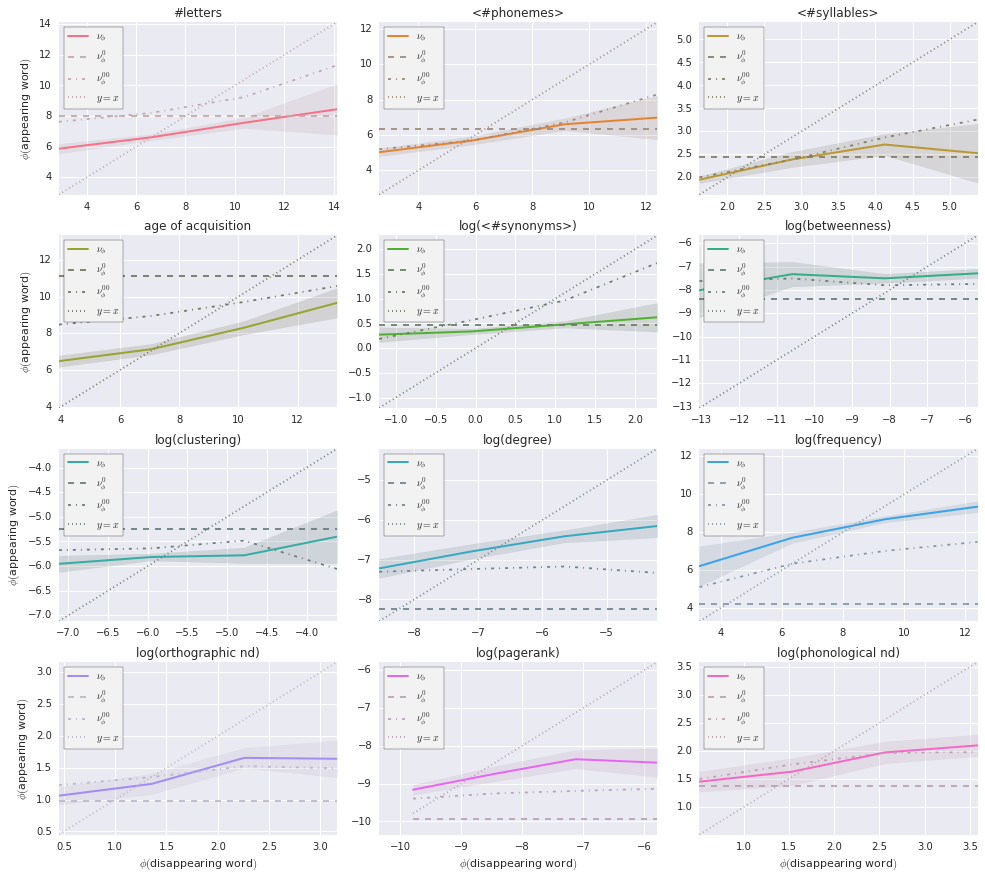

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

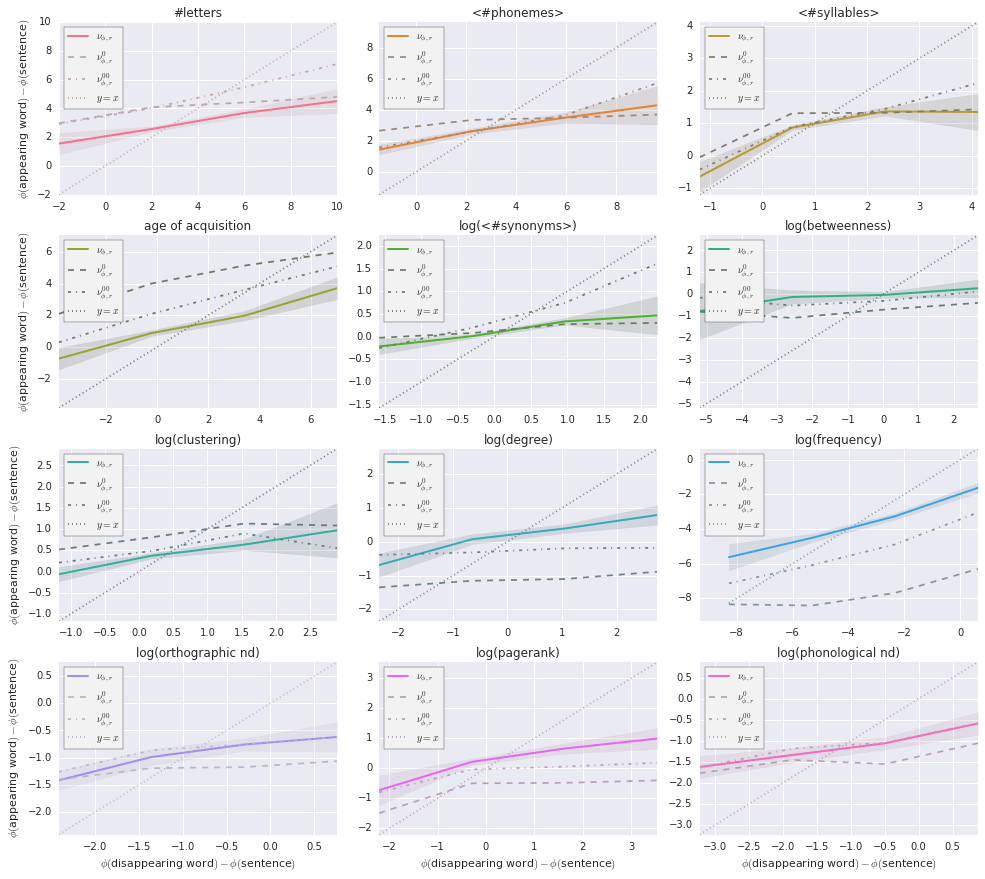

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

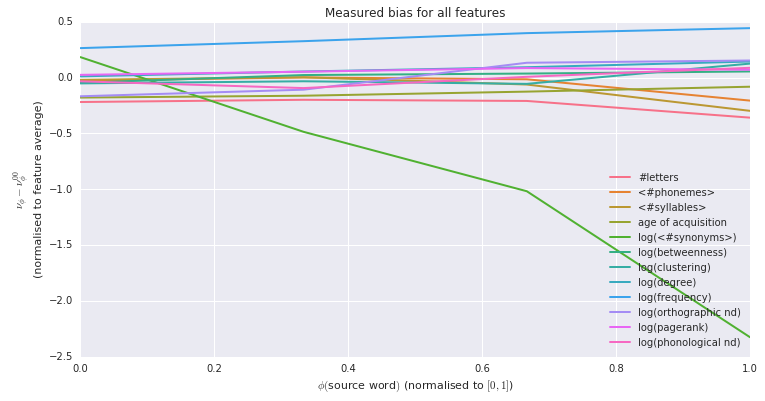

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

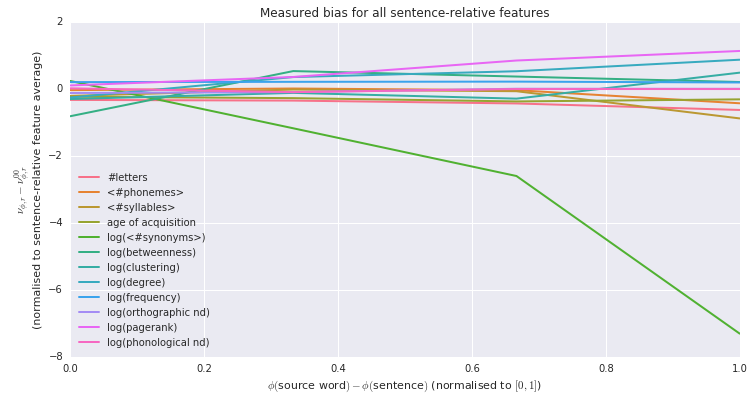

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

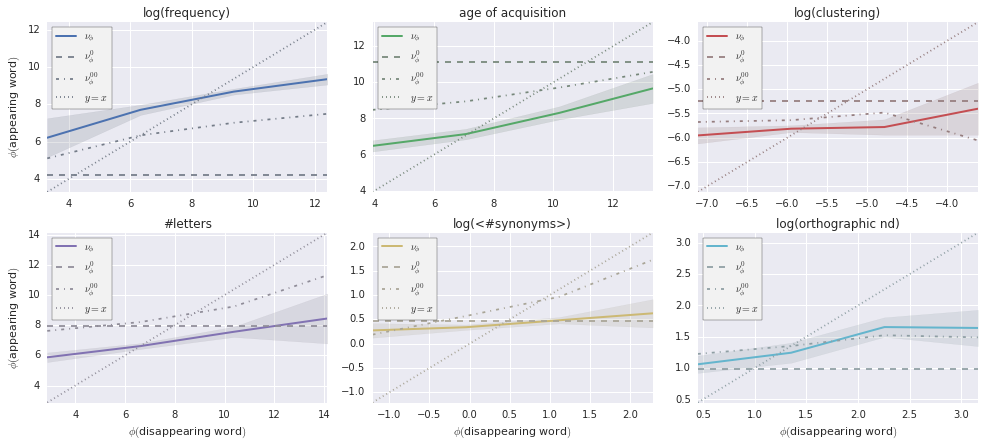

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

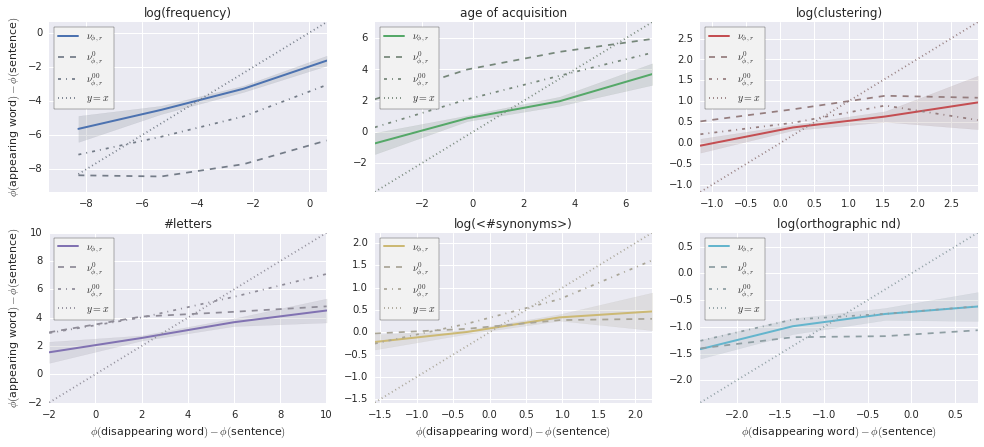

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

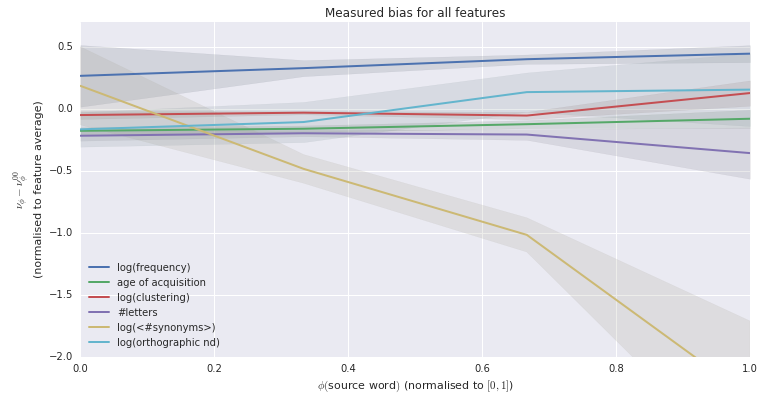

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

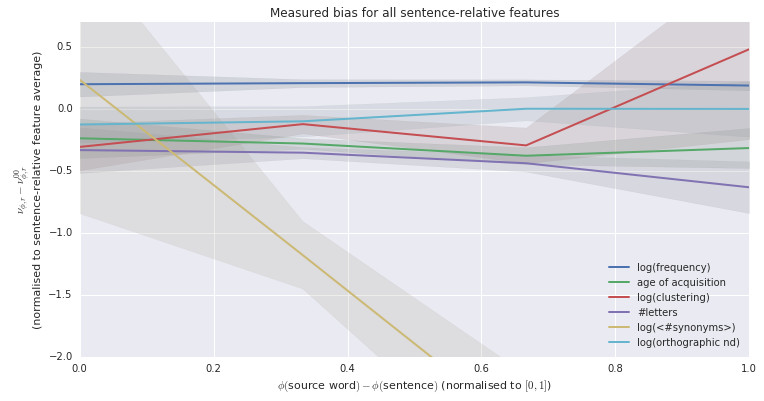

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


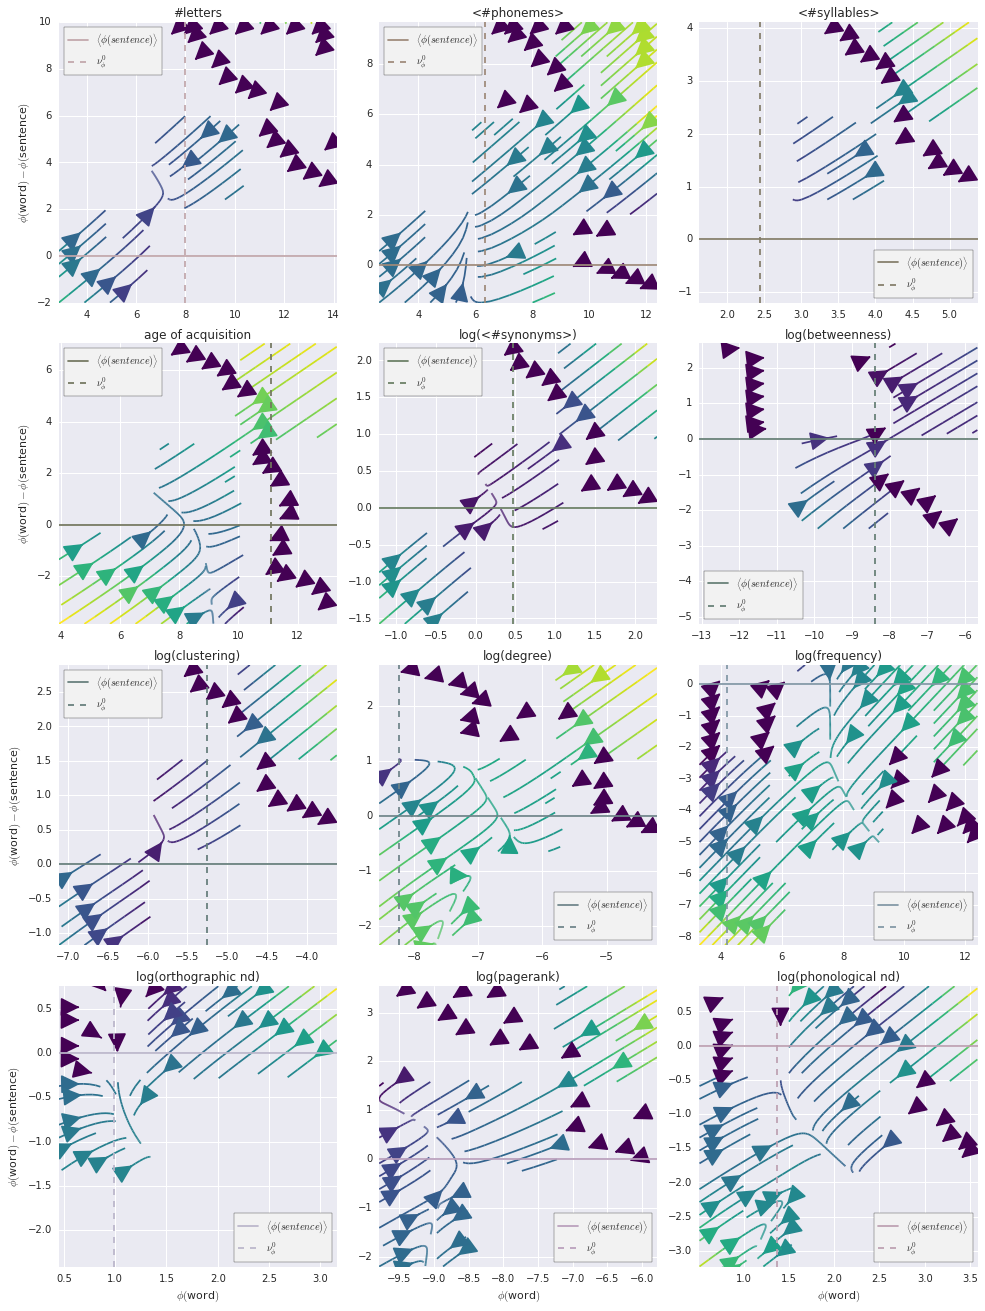

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


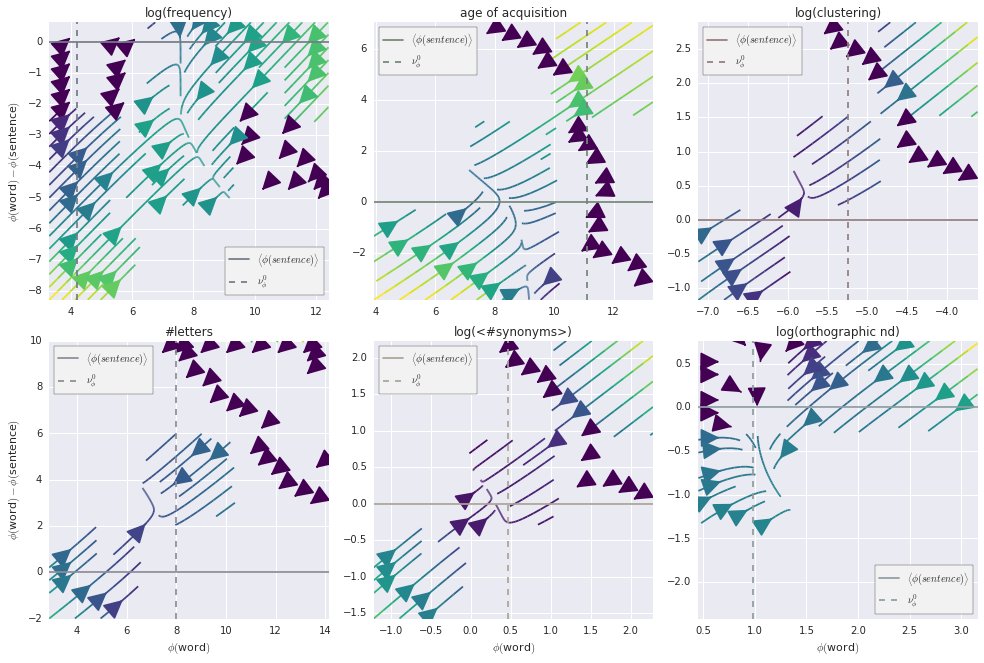

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54223207  0.16310988  0.08222848  0.06731316  0.03674563  0.03205263
  0.02046301  0.0184204   0.01580832  0.00900548  0.00739611]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.443983,0.315907,-0.081689,0.245929,0.223802,-0.427046,0.220637,0.288125,-0.411667,0.276259,-0.161178,0.002946
Component-1,0.300110,-0.403003,0.139592,-0.275849,-0.286922,-0.417922,0.167670,-0.294311,-0.452120,0.216955,-0.169038,0.013135
Component-2,-0.689013,-0.094624,0.120634,-0.072074,-0.688524,0.087470,0.007532,-0.043941,0.062319,-0.078448,-0.007316,0.052581


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 15119) |           | Elapsed Time: 0:00:44 ETA:  7 days, 20:11:28

  0% (   94 of 15119) |                    | Elapsed Time: 0:00:45 ETA:  0:01:57

  1% (  189 of 15119) |                    | Elapsed Time: 0:00:46 ETA:  0:01:40

  1% (  299 of 15119) |                    | Elapsed Time: 0:00:47 ETA:  0:01:36

  2% (  353 of 15119) |                    | Elapsed Time: 0:00:48 ETA:  0:01:56

  2% (  378 of 15119) |                    | Elapsed Time: 0:00:48 ETA:  0:01:54

  3% (  475 of 15119) |                    | Elapsed Time: 0:00:49 ETA:  0:01:52

  3% (  567 of 15119) |                    | Elapsed Time: 0:00:50 ETA:  0:01:47

  4% (  676 of 15119) |                    | Elapsed Time: 0:00:51 ETA:  0:01:43

  5% (  756 of 15119) |#                   | Elapsed Time: 0:00:52 ETA:  0:01:39

  5% (  887 of 15119) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:31

  6% (  945 of 15119) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:30

  7% ( 1072 of 15119) |#                   | Elapsed Time: 0:00:54 ETA:  0:01:26

  7% ( 1134 of 15119) |#                   | Elapsed Time: 0:00:55 ETA:  0:01:15

  8% ( 1254 of 15119) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:13

  8% ( 1323 of 15119) |#                   | Elapsed Time: 0:00:56 ETA:  0:01:09

  9% ( 1458 of 15119) |#                   | Elapsed Time: 0:00:57 ETA:  0:01:05

 10% ( 1512 of 15119) |##                  | Elapsed Time: 0:00:58 ETA:  0:01:02

 10% ( 1646 of 15119) |##                  | Elapsed Time: 0:00:59 ETA:  0:00:59

 11% ( 1701 of 15119) |##                  | Elapsed Time: 0:00:59 ETA:  0:00:59

 12% ( 1828 of 15119) |##                  | Elapsed Time: 0:01:00 ETA:  0:00:58

 12% ( 1890 of 15119) |##                  | Elapsed Time: 0:01:01 ETA:  0:00:59

 13% ( 1978 of 15119) |##                  | Elapsed Time: 0:01:02 ETA:  0:01:03

 13% ( 2079 of 15119) |##                  | Elapsed Time: 0:01:03 ETA:  0:01:05

 14% ( 2162 of 15119) |##                  | Elapsed Time: 0:01:04 ETA:  0:01:09

 14% ( 2243 of 15119) |##                  | Elapsed Time: 0:01:05 ETA:  0:01:17

 15% ( 2268 of 15119) |###                 | Elapsed Time: 0:01:05 ETA:  0:01:20

 15% ( 2354 of 15119) |###                 | Elapsed Time: 0:01:06 ETA:  0:01:29

 16% ( 2457 of 15119) |###                 | Elapsed Time: 0:01:07 ETA:  0:01:27

 16% ( 2561 of 15119) |###                 | Elapsed Time: 0:01:08 ETA:  0:01:31

 17% ( 2646 of 15119) |###                 | Elapsed Time: 0:01:09 ETA:  0:01:29

 18% ( 2746 of 15119) |###                 | Elapsed Time: 0:01:10 ETA:  0:01:26

 18% ( 2835 of 15119) |###                 | Elapsed Time: 0:01:11 ETA:  0:01:23

 19% ( 2974 of 15119) |###                 | Elapsed Time: 0:01:12 ETA:  0:01:11

 20% ( 3024 of 15119) |####                | Elapsed Time: 0:01:12 ETA:  0:01:04

 20% ( 3154 of 15119) |####                | Elapsed Time: 0:01:13 ETA:  0:00:59

 21% ( 3213 of 15119) |####                | Elapsed Time: 0:01:14 ETA:  0:00:54

 22% ( 3357 of 15119) |####                | Elapsed Time: 0:01:15 ETA:  0:00:50

 22% ( 3402 of 15119) |####                | Elapsed Time: 0:01:15 ETA:  0:00:46

 23% ( 3550 of 15119) |####                | Elapsed Time: 0:01:16 ETA:  0:00:39

 23% ( 3591 of 15119) |####                | Elapsed Time: 0:01:16 ETA:  0:00:35

 24% ( 3690 of 15119) |####                | Elapsed Time: 0:01:17 ETA:  0:00:38

 25% ( 3780 of 15119) |#####               | Elapsed Time: 0:01:18 ETA:  0:00:45

 25% ( 3888 of 15119) |#####               | Elapsed Time: 0:01:19 ETA:  0:00:47

 26% ( 3969 of 15119) |#####               | Elapsed Time: 0:01:20 ETA:  0:00:47

 26% ( 4061 of 15119) |#####               | Elapsed Time: 0:01:21 ETA:  0:00:56

 27% ( 4158 of 15119) |#####               | Elapsed Time: 0:01:22 ETA:  0:00:57

 28% ( 4286 of 15119) |#####               | Elapsed Time: 0:01:23 ETA:  0:00:59

 28% ( 4347 of 15119) |#####               | Elapsed Time: 0:01:23 ETA:  0:01:00

 29% ( 4429 of 15119) |#####               | Elapsed Time: 0:01:24 ETA:  0:01:02

 30% ( 4536 of 15119) |######              | Elapsed Time: 0:01:25 ETA:  0:00:58

 30% ( 4646 of 15119) |######              | Elapsed Time: 0:01:26 ETA:  0:00:57

 31% ( 4725 of 15119) |######              | Elapsed Time: 0:01:27 ETA:  0:00:55

 32% ( 4848 of 15119) |######              | Elapsed Time: 0:01:28 ETA:  0:00:49

 32% ( 4914 of 15119) |######              | Elapsed Time: 0:01:29 ETA:  0:00:47

 33% ( 5025 of 15119) |######              | Elapsed Time: 0:01:30 ETA:  0:00:50

 33% ( 5103 of 15119) |######              | Elapsed Time: 0:01:31 ETA:  0:00:52

 34% ( 5202 of 15119) |######              | Elapsed Time: 0:01:32 ETA:  0:00:48

 34% ( 5266 of 15119) |######              | Elapsed Time: 0:01:33 ETA:  0:00:55

 35% ( 5292 of 15119) |#######             | Elapsed Time: 0:01:33 ETA:  0:00:55

 35% ( 5411 of 15119) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:52

 36% ( 5481 of 15119) |#######             | Elapsed Time: 0:01:34 ETA:  0:00:52

 36% ( 5586 of 15119) |#######             | Elapsed Time: 0:01:35 ETA:  0:00:54

 37% ( 5670 of 15119) |#######             | Elapsed Time: 0:01:36 ETA:  0:00:58

 38% ( 5753 of 15119) |#######             | Elapsed Time: 0:01:37 ETA:  0:01:03

 38% ( 5859 of 15119) |#######             | Elapsed Time: 0:01:39 ETA:  0:01:01

 39% ( 5970 of 15119) |#######             | Elapsed Time: 0:01:40 ETA:  0:00:49

 40% ( 6048 of 15119) |########            | Elapsed Time: 0:01:40 ETA:  0:00:49

 40% ( 6144 of 15119) |########            | Elapsed Time: 0:01:41 ETA:  0:00:53

 41% ( 6237 of 15119) |########            | Elapsed Time: 0:01:42 ETA:  0:00:53

 42% ( 6360 of 15119) |########            | Elapsed Time: 0:01:43 ETA:  0:00:49

 42% ( 6426 of 15119) |########            | Elapsed Time: 0:01:44 ETA:  0:00:43

 43% ( 6550 of 15119) |########            | Elapsed Time: 0:01:45 ETA:  0:00:34

 43% ( 6615 of 15119) |########            | Elapsed Time: 0:01:45 ETA:  0:00:29

 44% ( 6725 of 15119) |########            | Elapsed Time: 0:01:46 ETA:  0:00:28

 45% ( 6804 of 15119) |#########           | Elapsed Time: 0:01:47 ETA:  0:00:29

 45% ( 6939 of 15119) |#########           | Elapsed Time: 0:01:48 ETA:  0:00:22

 46% ( 6993 of 15119) |#########           | Elapsed Time: 0:01:49 ETA:  0:00:18

 47% ( 7115 of 15119) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:15

 47% ( 7182 of 15119) |#########           | Elapsed Time: 0:01:50 ETA:  0:00:15

 48% ( 7293 of 15119) |#########           | Elapsed Time: 0:01:51 ETA:  0:00:16

 48% ( 7371 of 15119) |#########           | Elapsed Time: 0:01:52 ETA:  0:00:15

 49% ( 7483 of 15119) |#########           | Elapsed Time: 0:01:53 ETA:  0:00:16

 50% ( 7560 of 15119) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:15

 50% ( 7645 of 15119) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:16

 51% ( 7749 of 15119) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:19

 52% ( 7862 of 15119) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:18

 52% ( 7938 of 15119) |##########          | Elapsed Time: 0:01:57 ETA:  0:00:18

 53% ( 8058 of 15119) |##########          | Elapsed Time: 0:01:58 ETA:  0:00:16

 53% ( 8127 of 15119) |##########          | Elapsed Time: 0:01:59 ETA:  0:00:13

 54% ( 8234 of 15119) |##########          | Elapsed Time: 0:02:00 ETA:  0:00:15

 55% ( 8316 of 15119) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:14

 55% ( 8402 of 15119) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:16

 56% ( 8505 of 15119) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:12

 57% ( 8624 of 15119) |###########         | Elapsed Time: 0:02:03 ETA:  0:00:10

 57% ( 8694 of 15119) |###########         | Elapsed Time: 0:02:04 ETA:  0:00:12

 58% ( 8820 of 15119) |###########         | Elapsed Time: 0:02:05 ETA:  0:00:10

 58% ( 8883 of 15119) |###########         | Elapsed Time: 0:02:06 ETA:  0:00:11

 59% ( 8997 of 15119) |###########         | Elapsed Time: 0:02:07 ETA:  0:00:12

 60% ( 9072 of 15119) |############        | Elapsed Time: 0:02:07 ETA:  0:00:10

 60% ( 9195 of 15119) |############        | Elapsed Time: 0:02:08 ETA:  0:00:08

 61% ( 9261 of 15119) |############        | Elapsed Time: 0:02:09 ETA:  0:00:00

 62% ( 9379 of 15119) |############        | Elapsed Time: 0:02:10 ETA:  0:00:00

 62% ( 9450 of 15119) |############        | Elapsed Time: 0:02:10 ETA:  0:00:00

 63% ( 9564 of 15119) |############        | Elapsed Time: 0:02:11 ETA:  0:00:00

 63% ( 9639 of 15119) |############        | Elapsed Time: 0:02:12 ETA:  0:00:00

 64% ( 9756 of 15119) |############        | Elapsed Time: 0:02:13 ETA:  0:00:00

 65% ( 9828 of 15119) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:00

 65% ( 9955 of 15119) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:00

 66% (10017 of 15119) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:00

 67% (10134 of 15119) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:00

 67% (10206 of 15119) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:00

 68% (10294 of 15119) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:00

 68% (10395 of 15119) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:01

 69% (10526 of 15119) |#############       | Elapsed Time: 0:02:20 ETA:  0:00:00

 70% (10584 of 15119) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:00

 70% (10655 of 15119) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:00

 71% (10773 of 15119) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:02

 71% (10847 of 15119) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:10

 72% (10962 of 15119) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:07

 73% (11067 of 15119) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:02

 73% (11151 of 15119) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:00

 74% (11254 of 15119) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:04

 75% (11340 of 15119) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:04

 75% (11458 of 15119) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:00

 76% (11529 of 15119) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:00

 77% (11649 of 15119) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:00

 77% (11718 of 15119) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:00

 78% (11829 of 15119) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:00

 78% (11907 of 15119) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:00

 79% (12028 of 15119) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:00

 80% (12096 of 15119) |################    | Elapsed Time: 0:02:35 ETA:  0:00:00

 80% (12195 of 15119) |################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 81% (12285 of 15119) |################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 81% (12390 of 15119) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 82% (12474 of 15119) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 83% (12590 of 15119) |################    | Elapsed Time: 0:02:39 ETA:  0:00:00

 83% (12663 of 15119) |################    | Elapsed Time: 0:02:40 ETA:  0:00:00

 84% (12773 of 15119) |################    | Elapsed Time: 0:02:41 ETA:  0:00:00

 85% (12852 of 15119) |#################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 85% (12961 of 15119) |#################   | Elapsed Time: 0:02:43 ETA:  0:00:00

 86% (13041 of 15119) |#################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 86% (13147 of 15119) |#################   | Elapsed Time: 0:02:45 ETA:  0:00:00

 87% (13230 of 15119) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:00

 88% (13329 of 15119) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:00

 88% (13419 of 15119) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:00

 89% (13525 of 15119) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:00

 90% (13608 of 15119) |##################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 90% (13729 of 15119) |##################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 91% (13797 of 15119) |##################  | Elapsed Time: 0:02:51 ETA:  0:00:00

 91% (13899 of 15119) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 92% (13986 of 15119) |##################  | Elapsed Time: 0:02:52 ETA:  0:00:00

 93% (14110 of 15119) |##################  | Elapsed Time: 0:02:53 ETA:  0:00:00

 93% (14175 of 15119) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 94% (14278 of 15119) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 95% (14364 of 15119) |################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 95% (14466 of 15119) |################### | Elapsed Time: 0:02:57 ETA:  0:00:00

 96% (14553 of 15119) |################### | Elapsed Time: 0:02:58 ETA:  0:00:00

 97% (14670 of 15119) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 97% (14742 of 15119) |################### | Elapsed Time: 0:02:59 ETA:  0:00:00

 98% (14837 of 15119) |################### | Elapsed Time: 0:03:00 ETA:  0:00:00

 98% (14931 of 15119) |################### | Elapsed Time: 0:03:01 ETA:  0:00:00

 99% (15039 of 15119) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:03:03 Time: 0:03:03


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

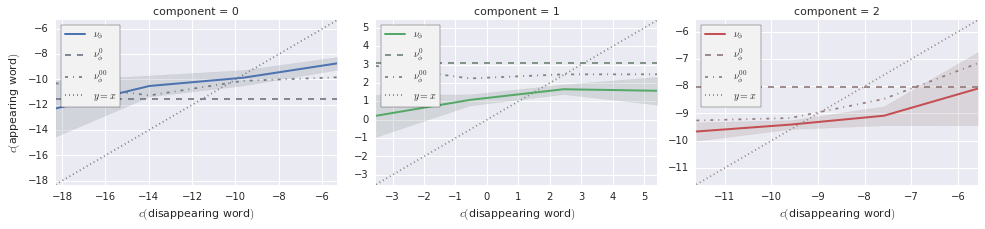

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55494452  0.17897449  0.14998054]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.697296,-0.102654,0.329757,-0.556457,0.291129,0.009935
Component-1,0.411788,0.118834,-0.508742,-0.687648,0.290567,-0.014188
Component-2,0.579456,-0.108309,0.773708,-0.220501,0.053532,-0.048896


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 15119) |            | Elapsed Time: 0:00:12 ETA:  2 days, 4:57:23

  0% (  121 of 15119) |                    | Elapsed Time: 0:00:13 ETA:  0:01:52

  1% (  189 of 15119) |                    | Elapsed Time: 0:00:14 ETA:  0:01:48

  2% (  310 of 15119) |                    | Elapsed Time: 0:00:15 ETA:  0:01:48

  2% (  378 of 15119) |                    | Elapsed Time: 0:00:15 ETA:  0:01:57

  3% (  497 of 15119) |                    | Elapsed Time: 0:00:16 ETA:  0:01:54

  3% (  567 of 15119) |                    | Elapsed Time: 0:00:17 ETA:  0:01:52

  4% (  700 of 15119) |                    | Elapsed Time: 0:00:18 ETA:  0:01:48

  5% (  756 of 15119) |#                   | Elapsed Time: 0:00:18 ETA:  0:01:47

  5% (  886 of 15119) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:44

  6% (  945 of 15119) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:43

  7% ( 1084 of 15119) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:40

  7% ( 1134 of 15119) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:39

  8% ( 1273 of 15119) |#                   | Elapsed Time: 0:00:22 ETA:  0:01:32

  8% ( 1323 of 15119) |#                   | Elapsed Time: 0:00:23 ETA:  0:01:29

  9% ( 1466 of 15119) |#                   | Elapsed Time: 0:00:24 ETA:  0:01:27

 10% ( 1512 of 15119) |##                  | Elapsed Time: 0:00:24 ETA:  0:01:26

 10% ( 1647 of 15119) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:25

 11% ( 1701 of 15119) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:23

 12% ( 1836 of 15119) |##                  | Elapsed Time: 0:00:26 ETA:  0:01:22

 12% ( 1890 of 15119) |##                  | Elapsed Time: 0:00:27 ETA:  0:01:23

 13% ( 2011 of 15119) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:24

 13% ( 2079 of 15119) |##                  | Elapsed Time: 0:00:28 ETA:  0:01:26

 14% ( 2174 of 15119) |##                  | Elapsed Time: 0:00:29 ETA:  0:01:30

 15% ( 2268 of 15119) |###                 | Elapsed Time: 0:00:30 ETA:  0:01:38

 15% ( 2371 of 15119) |###                 | Elapsed Time: 0:00:31 ETA:  0:01:43

 16% ( 2457 of 15119) |###                 | Elapsed Time: 0:00:32 ETA:  0:01:42

 17% ( 2585 of 15119) |###                 | Elapsed Time: 0:00:33 ETA:  0:01:42

 17% ( 2646 of 15119) |###                 | Elapsed Time: 0:00:34 ETA:  0:01:41

 18% ( 2763 of 15119) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:40

 18% ( 2835 of 15119) |###                 | Elapsed Time: 0:00:35 ETA:  0:01:38

 19% ( 2987 of 15119) |###                 | Elapsed Time: 0:00:36 ETA:  0:01:28

 20% ( 3024 of 15119) |####                | Elapsed Time: 0:00:36 ETA:  0:01:22

 20% ( 3167 of 15119) |####                | Elapsed Time: 0:00:37 ETA:  0:01:18

 21% ( 3213 of 15119) |####                | Elapsed Time: 0:00:38 ETA:  0:01:14

 22% ( 3336 of 15119) |####                | Elapsed Time: 0:00:39 ETA:  0:01:15

 22% ( 3402 of 15119) |####                | Elapsed Time: 0:00:39 ETA:  0:01:12

 23% ( 3559 of 15119) |####                | Elapsed Time: 0:00:40 ETA:  0:01:08

 23% ( 3591 of 15119) |####                | Elapsed Time: 0:00:40 ETA:  0:01:05

 24% ( 3706 of 15119) |####                | Elapsed Time: 0:00:41 ETA:  0:01:06

 25% ( 3780 of 15119) |#####               | Elapsed Time: 0:00:42 ETA:  0:01:12

 25% ( 3896 of 15119) |#####               | Elapsed Time: 0:00:43 ETA:  0:01:14

 26% ( 3969 of 15119) |#####               | Elapsed Time: 0:00:44 ETA:  0:01:16

 26% ( 4078 of 15119) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:17

 27% ( 4158 of 15119) |#####               | Elapsed Time: 0:00:45 ETA:  0:01:16

 28% ( 4286 of 15119) |#####               | Elapsed Time: 0:00:46 ETA:  0:01:16

 28% ( 4347 of 15119) |#####               | Elapsed Time: 0:00:47 ETA:  0:01:22

 29% ( 4438 of 15119) |#####               | Elapsed Time: 0:00:48 ETA:  0:01:26

 30% ( 4536 of 15119) |######              | Elapsed Time: 0:00:49 ETA:  0:01:24

 30% ( 4659 of 15119) |######              | Elapsed Time: 0:00:50 ETA:  0:01:20

 31% ( 4725 of 15119) |######              | Elapsed Time: 0:00:50 ETA:  0:01:18

 32% ( 4867 of 15119) |######              | Elapsed Time: 0:00:51 ETA:  0:01:14

 32% ( 4914 of 15119) |######              | Elapsed Time: 0:00:52 ETA:  0:01:11

 33% ( 5034 of 15119) |######              | Elapsed Time: 0:00:53 ETA:  0:01:11

 33% ( 5103 of 15119) |######              | Elapsed Time: 0:00:53 ETA:  0:01:13

 34% ( 5221 of 15119) |######              | Elapsed Time: 0:00:54 ETA:  0:01:11

 35% ( 5292 of 15119) |#######             | Elapsed Time: 0:00:55 ETA:  0:01:08

 35% ( 5424 of 15119) |#######             | Elapsed Time: 0:00:56 ETA:  0:01:06

 36% ( 5481 of 15119) |#######             | Elapsed Time: 0:00:56 ETA:  0:01:05

 37% ( 5606 of 15119) |#######             | Elapsed Time: 0:00:57 ETA:  0:01:05

 37% ( 5670 of 15119) |#######             | Elapsed Time: 0:00:58 ETA:  0:01:08

 38% ( 5788 of 15119) |#######             | Elapsed Time: 0:00:59 ETA:  0:01:08

 38% ( 5859 of 15119) |#######             | Elapsed Time: 0:01:00 ETA:  0:01:08

 39% ( 5977 of 15119) |#######             | Elapsed Time: 0:01:01 ETA:  0:01:06

 40% ( 6048 of 15119) |########            | Elapsed Time: 0:01:01 ETA:  0:01:07

 40% ( 6161 of 15119) |########            | Elapsed Time: 0:01:02 ETA:  0:01:04

 41% ( 6237 of 15119) |########            | Elapsed Time: 0:01:03 ETA:  0:01:06

 42% ( 6375 of 15119) |########            | Elapsed Time: 0:01:04 ETA:  0:01:02

 42% ( 6392 of 15119) |########            | Elapsed Time: 0:01:07 ETA:  0:02:04

 42% ( 6426 of 15119) |########            | Elapsed Time: 0:01:08 ETA:  0:02:06

 43% ( 6545 of 15119) |########            | Elapsed Time: 0:01:09 ETA:  0:02:05

 43% ( 6615 of 15119) |########            | Elapsed Time: 0:01:09 ETA:  0:02:04

 44% ( 6726 of 15119) |########            | Elapsed Time: 0:01:10 ETA:  0:02:04

 45% ( 6804 of 15119) |#########           | Elapsed Time: 0:01:11 ETA:  0:02:03

 45% ( 6945 of 15119) |#########           | Elapsed Time: 0:01:12 ETA:  0:01:55

 46% ( 6993 of 15119) |#########           | Elapsed Time: 0:01:12 ETA:  0:01:55

 47% ( 7121 of 15119) |#########           | Elapsed Time: 0:01:13 ETA:  0:01:57

 47% ( 7182 of 15119) |#########           | Elapsed Time: 0:01:14 ETA:  0:00:48

 48% ( 7295 of 15119) |#########           | Elapsed Time: 0:01:15 ETA:  0:00:49

 48% ( 7371 of 15119) |#########           | Elapsed Time: 0:01:16 ETA:  0:00:48

 49% ( 7467 of 15119) |#########           | Elapsed Time: 0:01:17 ETA:  0:00:50

 50% ( 7560 of 15119) |##########          | Elapsed Time: 0:01:17 ETA:  0:00:50

 50% ( 7649 of 15119) |##########          | Elapsed Time: 0:01:18 ETA:  0:00:53

 51% ( 7749 of 15119) |##########          | Elapsed Time: 0:01:19 ETA:  0:00:56

 51% ( 7860 of 15119) |##########          | Elapsed Time: 0:01:20 ETA:  0:00:57

 52% ( 7938 of 15119) |##########          | Elapsed Time: 0:01:21 ETA:  0:00:56

 53% ( 8076 of 15119) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:52

 53% ( 8127 of 15119) |##########          | Elapsed Time: 0:01:22 ETA:  0:00:50

 54% ( 8250 of 15119) |##########          | Elapsed Time: 0:01:23 ETA:  0:00:49

 55% ( 8316 of 15119) |###########         | Elapsed Time: 0:01:24 ETA:  0:00:45

 55% ( 8419 of 15119) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:45

 56% ( 8505 of 15119) |###########         | Elapsed Time: 0:01:25 ETA:  0:00:39

 57% ( 8630 of 15119) |###########         | Elapsed Time: 0:01:26 ETA:  0:00:37

 57% ( 8694 of 15119) |###########         | Elapsed Time: 0:01:27 ETA:  0:00:35

 58% ( 8825 of 15119) |###########         | Elapsed Time: 0:01:28 ETA:  0:00:34

 58% ( 8883 of 15119) |###########         | Elapsed Time: 0:01:29 ETA:  0:00:36

 59% ( 9005 of 15119) |###########         | Elapsed Time: 0:01:30 ETA:  0:00:35

 60% ( 9072 of 15119) |############        | Elapsed Time: 0:01:30 ETA:  0:00:35

 60% ( 9199 of 15119) |############        | Elapsed Time: 0:01:31 ETA:  0:00:33

 61% ( 9261 of 15119) |############        | Elapsed Time: 0:01:32 ETA:  0:00:27

 62% ( 9390 of 15119) |############        | Elapsed Time: 0:01:33 ETA:  0:00:27

 62% ( 9450 of 15119) |############        | Elapsed Time: 0:01:33 ETA:  0:00:26

 63% ( 9587 of 15119) |############        | Elapsed Time: 0:01:34 ETA:  0:00:23

 63% ( 9639 of 15119) |############        | Elapsed Time: 0:01:35 ETA:  0:00:25

 64% ( 9767 of 15119) |############        | Elapsed Time: 0:01:36 ETA:  0:00:24

 65% ( 9828 of 15119) |#############       | Elapsed Time: 0:01:36 ETA:  0:00:22

 65% ( 9964 of 15119) |#############       | Elapsed Time: 0:01:37 ETA:  0:00:19

 66% (10017 of 15119) |#############       | Elapsed Time: 0:01:38 ETA:  0:00:19

 67% (10139 of 15119) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:21

 67% (10206 of 15119) |#############       | Elapsed Time: 0:01:39 ETA:  0:00:21

 68% (10323 of 15119) |#############       | Elapsed Time: 0:01:40 ETA:  0:00:21

 68% (10395 of 15119) |#############       | Elapsed Time: 0:01:41 ETA:  0:00:21

 69% (10537 of 15119) |#############       | Elapsed Time: 0:01:42 ETA:  0:00:15

 70% (10584 of 15119) |##############      | Elapsed Time: 0:01:42 ETA:  0:00:14

 70% (10672 of 15119) |##############      | Elapsed Time: 0:01:43 ETA:  0:00:19

 71% (10773 of 15119) |##############      | Elapsed Time: 0:01:44 ETA:  0:00:19

 71% (10871 of 15119) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:21

 72% (10962 of 15119) |##############      | Elapsed Time: 0:01:45 ETA:  0:00:18

 73% (11097 of 15119) |##############      | Elapsed Time: 0:01:46 ETA:  0:00:15

 73% (11151 of 15119) |##############      | Elapsed Time: 0:01:47 ETA:  0:00:12

 74% (11281 of 15119) |##############      | Elapsed Time: 0:01:48 ETA:  0:00:12

 75% (11340 of 15119) |###############     | Elapsed Time: 0:01:48 ETA:  0:00:14

 75% (11473 of 15119) |###############     | Elapsed Time: 0:01:49 ETA:  0:00:12

 76% (11529 of 15119) |###############     | Elapsed Time: 0:01:49 ETA:  0:00:06

 77% (11661 of 15119) |###############     | Elapsed Time: 0:01:50 ETA:  0:00:05

 77% (11718 of 15119) |###############     | Elapsed Time: 0:01:51 ETA:  0:00:01

 78% (11847 of 15119) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:02

 78% (11907 of 15119) |###############     | Elapsed Time: 0:01:52 ETA:  0:00:02

 79% (12042 of 15119) |###############     | Elapsed Time: 0:01:53 ETA:  0:00:02

 80% (12096 of 15119) |################    | Elapsed Time: 0:01:54 ETA:  0:00:03

 80% (12215 of 15119) |################    | Elapsed Time: 0:01:55 ETA:  0:00:03

 81% (12285 of 15119) |################    | Elapsed Time: 0:01:55 ETA:  0:00:03

 82% (12400 of 15119) |################    | Elapsed Time: 0:01:56 ETA:  0:00:04

 82% (12474 of 15119) |################    | Elapsed Time: 0:01:57 ETA:  0:00:08

 83% (12588 of 15119) |################    | Elapsed Time: 0:01:58 ETA:  0:00:08

 83% (12663 of 15119) |################    | Elapsed Time: 0:01:59 ETA:  0:00:07

 84% (12792 of 15119) |################    | Elapsed Time: 0:02:00 ETA:  0:00:05

 85% (12852 of 15119) |#################   | Elapsed Time: 0:02:00 ETA:  0:00:07

 85% (12989 of 15119) |#################   | Elapsed Time: 0:02:01 ETA:  0:00:03

 86% (13041 of 15119) |#################   | Elapsed Time: 0:02:02 ETA:  0:00:03

 87% (13166 of 15119) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:02

 87% (13230 of 15119) |#################   | Elapsed Time: 0:02:03 ETA:  0:00:01

 88% (13354 of 15119) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:00

 88% (13419 of 15119) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:00

 89% (13527 of 15119) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:00

 90% (13608 of 15119) |##################  | Elapsed Time: 0:02:06 ETA:  0:00:00

 90% (13752 of 15119) |##################  | Elapsed Time: 0:02:07 ETA:  0:00:00

 91% (13797 of 15119) |##################  | Elapsed Time: 0:02:08 ETA:  0:00:00

 92% (13933 of 15119) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 92% (13986 of 15119) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 93% (14120 of 15119) |##################  | Elapsed Time: 0:02:10 ETA:  0:00:00

 93% (14175 of 15119) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 94% (14308 of 15119) |##################  | Elapsed Time: 0:02:12 ETA:  0:00:00

 95% (14364 of 15119) |################### | Elapsed Time: 0:02:12 ETA:  0:00:00

 95% (14459 of 15119) |################### | Elapsed Time: 0:02:13 ETA:  0:00:00

 96% (14553 of 15119) |################### | Elapsed Time: 0:02:14 ETA:  0:00:00

 97% (14679 of 15119) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 97% (14742 of 15119) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

 98% (14847 of 15119) |################### | Elapsed Time: 0:02:16 ETA:  0:00:00

 98% (14931 of 15119) |################### | Elapsed Time: 0:02:17 ETA:  0:00:00

 99% (15047 of 15119) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:02:19 Time: 0:02:19


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

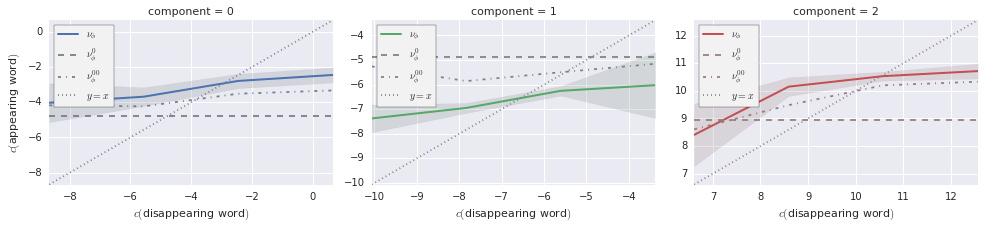

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1115 (cluster-unique) substitutions, but the PCA is in fact computed on 461 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.